## Event based

In [1]:
import climtas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

In [2]:
# opening the input files with heatwave severity data 
thw = xr.open_dataset('/g/data/e14/cp3790/Charuni/Tasmania/aus-coastal-sev.nc')
mhw = xr.open_dataset('/g/data/e14/cp3790/Charuni/Tasmania/aus-ocean-sev-2.nc')

In [3]:
# using climtas.event.find_events to identify days where severity>1 for a minimum of 3 consecutive days 
thw_events = climtas.event.find_events(thw.severity > 1, min_duration = 3)
thw_events

,time,latitude,longitude,event_duration
0,0,48,151,3
1,0,48,152,3
2,0,50,152,3
3,0,54,154,3
4,0,54,155,3
...,...,...,...,...
165334,13508,130,142,6
165335,13508,130,143,6
165336,13508,131,142,6
165337,13508,133,140,6


In [4]:
def get_coords(da, events):
    # Convert the index values to coordinates
    coords = {}
    for d in da.dims:
        coords[d] = da[d].values[events[d].values]
    
    # Also work out when the event ends
    coords['time_end'] = da['time'].values[events['time'].values + events['event_duration'].values-1]
    #coords['event_duration'] = coords['time_end'] - coords['time'] 
    coords['event_duration'] = events['event_duration'].values
    
    return pd.DataFrame(coords, index=events.index)

In [5]:
thw_new = get_coords(thw, thw_events)
thw_new

,latitude,longitude,time,time_end,event_duration
0,-22.00,150.75,1982-01-01,1982-01-03,3
1,-22.00,151.00,1982-01-01,1982-01-03,3
2,-22.50,151.00,1982-01-01,1982-01-03,3
3,-23.50,151.50,1982-01-01,1982-01-03,3
4,-23.50,151.75,1982-01-01,1982-01-03,3
...,...,...,...,...,...
165334,-42.50,148.50,2018-12-26,2018-12-31,6
165335,-42.50,148.75,2018-12-26,2018-12-31,6
165336,-42.75,148.50,2018-12-26,2018-12-31,6
165337,-43.25,148.00,2018-12-26,2018-12-31,6


In [6]:
thw_new_df = thw_new.reset_index()
thw_new_df.set_index(['latitude', 'longitude'], inplace=True)
thw_new_df

index       time   time_end  event_duration
latitude longitude                                              
-22.00   150.75          0 1982-01-01 1982-01-03               3
         151.00          1 1982-01-01 1982-01-03               3
-22.50   151.00          2 1982-01-01 1982-01-03               3
-23.50   151.50          3 1982-01-01 1982-01-03               3
         151.75          4 1982-01-01 1982-01-03               3
...                    ...        ...        ...             ...
-42.50   148.50     165334 2018-12-26 2018-12-31               6
         148.75     165335 2018-12-26 2018-12-31               6
-42.75   148.50     165336 2018-12-26 2018-12-31               6
-43.25   148.00     165337 2018-12-26 2018-12-31               6
         148.25     165338 2018-12-26 2018-12-31               6

[165339 rows x 4 columns]

In [7]:
# using climtas.event.find_events to identify days where severity>1 for a minimum of 5 consecutive days (MHW events)
mhw_events = climtas.event.find_events(mhw.severity > 1, min_duration = 5)
mhw_events

,time,latitude,longitude,event_duration
0,0,0,29,5
1,0,1,123,5
2,0,1,124,5
3,0,4,94,5
4,0,4,95,5
...,...,...,...,...
127727,13497,135,133,17
127728,13500,135,134,14
127729,13500,135,135,14
127730,13491,135,136,23


In [8]:
mhw_new = get_coords(mhw, mhw_events)
mhw_new

,latitude,longitude,time,time_end,event_duration
0,-10.00,120.25,1982-01-01,1982-01-05,5
1,-10.25,143.75,1982-01-01,1982-01-05,5
2,-10.25,144.00,1982-01-01,1982-01-05,5
3,-11.00,136.50,1982-01-01,1982-01-05,5
4,-11.00,136.75,1982-01-01,1982-01-05,5
...,...,...,...,...,...
127727,-43.75,146.25,2018-12-15,2018-12-31,17
127728,-43.75,146.50,2018-12-18,2018-12-31,14
127729,-43.75,146.75,2018-12-18,2018-12-31,14
127730,-43.75,147.00,2018-12-09,2018-12-31,23


In [9]:
mhw_new_df = mhw_new.reset_index()
mhw_new_df.set_index(['latitude', 'longitude'], inplace=True)
mhw_new_df

index       time   time_end  event_duration
latitude longitude                                              
-10.00   120.25          0 1982-01-01 1982-01-05               5
-10.25   143.75          1 1982-01-01 1982-01-05               5
         144.00          2 1982-01-01 1982-01-05               5
-11.00   136.50          3 1982-01-01 1982-01-05               5
         136.75          4 1982-01-01 1982-01-05               5
...                    ...        ...        ...             ...
-43.75   146.25     127727 2018-12-15 2018-12-31              17
         146.50     127728 2018-12-18 2018-12-31              14
         146.75     127729 2018-12-18 2018-12-31              14
         147.00     127730 2018-12-09 2018-12-31              23
         147.25     127731 2018-12-13 2018-12-31              19

[127732 rows x 4 columns]

In [10]:
# merging the THW and MHW dataframes based on latitude and longitude 
df_merge_col = pd.merge(thw_new_df.head(1300), mhw_new_df.head(1300), on=['latitude', 'longitude'])
df_merge_col

index_x     time_x time_end_x  event_duration_x  index_y  \
latitude longitude                                                             
-22.00   150.75           0 1982-01-01 1982-01-03                 3      149   
         150.75           0 1982-01-01 1982-01-03                 3      557   
         150.75           0 1982-01-01 1982-01-03                 3     1008   
         150.75           0 1982-01-01 1982-01-03                 3     1291   
         150.75         570 1982-02-17 1982-02-21                 5      149   
...                     ...        ...        ...               ...      ...   
-34.75   135.50        1243 1982-08-06 1982-08-08                 3      814   
         135.50        1243 1982-08-06 1982-08-08                 3     1105   
-21.50   114.25        1244 1982-08-07 1982-08-09                 3     1257   
-43.50   147.25        1273 1982-08-07 1982-08-09                 3      518   
-43.75   147.25        1277 1982-08-07 1982-08-09                 3      522   

                       time_y time_end_y  event_duration_y  
latitude longitude                                          
-22.00   150.75    1982-01-02 1982-01-08                 7  
         150.75    1982-01-18 1982-01-26                 9  
         150.75    1982-03-04 1982-03-12                 9  
         150.75    1982-03-16 1982-03-21                 6  
         150.75    1982-01-02 1982-01-08                 7  
...                       ...        ...               ...  
-34.75   135.50    1982-02-10 1982-02-20                11  
         135.50    1982-03-10 1982-03-16                 7  
-21.50   114.25    1982-03-16 1982-03-20                 5  
-43.50   147.25    1982-01-18 1982-01-23                 6  
-43.75   147.25    1982-01-18 1982-01-23                 6  

[2166 rows x 8 columns]

In [11]:
del df_merge_col['index_y']
del df_merge_col['index_x']
df_merge_col

time_x time_end_x  event_duration_x     time_y  \
latitude longitude                                                      
-22.00   150.75    1982-01-01 1982-01-03                 3 1982-01-02   
         150.75    1982-01-01 1982-01-03                 3 1982-01-18   
         150.75    1982-01-01 1982-01-03                 3 1982-03-04   
         150.75    1982-01-01 1982-01-03                 3 1982-03-16   
         150.75    1982-02-17 1982-02-21                 5 1982-01-02   
...                       ...        ...               ...        ...   
-34.75   135.50    1982-08-06 1982-08-08                 3 1982-02-10   
         135.50    1982-08-06 1982-08-08                 3 1982-03-10   
-21.50   114.25    1982-08-07 1982-08-09                 3 1982-03-16   
-43.50   147.25    1982-08-07 1982-08-09                 3 1982-01-18   
-43.75   147.25    1982-08-07 1982-08-09                 3 1982-01-18   

                   time_end_y  event_duration_y  
latitude longitude                               
-22.00   150.75    1982-01-08                 7  
         150.75    1982-01-26                 9  
         150.75    1982-03-12                 9  
         150.75    1982-03-21                 6  
         150.75    1982-01-08                 7  
...                       ...               ...  
-34.75   135.50    1982-02-20                11  
         135.50    1982-03-16                 7  
-21.50   114.25    1982-03-20                 5  
-43.50   147.25    1982-01-23                 6  
-43.75   147.25    1982-01-23                 6  

[2166 rows x 6 columns]

In [22]:
#Calculating the overlap between THW and MHW events 
from datetime import datetime
from collections import namedtuple
Range = namedtuple('Range', ['start', 'end'])
print(df_merge_col.shape)
overlap = []
#print(df_merge_col['time_y'].iloc[0])
for n in range (df_merge_col.shape[0]):
    mhw = Range(start=df_merge_col['time_y'].iloc[n], end=df_merge_col['time_end_y'].iloc[n])
    thw = Range(start=df_merge_col['time_x'].iloc[n], end=df_merge_col['time_end_x'].iloc[n])
    latest_start = max(mhw.start, thw.start)
    earliest_end = min(mhw.end, thw.end)
    delta = (earliest_end - latest_start).days + 1
    b = max(0, delta)
    overlap.append(b)

(2166, 6)


In [24]:
#Retaining only the THW events which had an overlap of at least one day with a MHW event; these are the co-occurring events
mod_fd = df_merge_col.assign(overlap_days = overlap)
mod_fd = mod_fd[mod_fd.overlap_days != 0]
mod_fd

time_x time_end_x  event_duration_x     time_y  \
latitude longitude                                                      
-22.00   150.75    1982-01-01 1982-01-03                 3 1982-01-02   
         150.75    1982-03-03 1982-03-08                 6 1982-03-04   
         150.75    1982-03-12 1982-03-14                 3 1982-03-04   
         151.00    1982-01-01 1982-01-03                 3 1982-01-02   
         151.00    1982-03-03 1982-03-08                 6 1982-03-04   
...                       ...        ...               ...        ...   
-14.00   144.50    1982-03-07 1982-03-13                 7 1982-03-07   
-14.25   143.75    1982-03-09 1982-03-13                 5 1982-03-08   
-14.50   145.50    1982-03-05 1982-03-13                 9 1982-03-06   
-13.00   143.50    1982-03-09 1982-03-14                 6 1982-03-07   
-14.00   137.00    1982-03-14 1982-03-16                 3 1982-03-09   

                   time_end_y  event_duration_y  overlap_days  
latitude longitude                                             
-22.00   150.75    1982-01-08                 7             2  
         150.75    1982-03-12                 9             5  
         150.75    1982-03-12                 9             1  
         151.00    1982-01-08                 7             2  
         151.00    1982-03-20                17             5  
...                       ...               ...           ...  
-14.00   144.50    1982-03-15                 9             7  
-14.25   143.75    1982-03-15                 8             5  
-14.50   145.50    1982-03-18                13             8  
-13.00   143.50    1982-03-11                 5             3  
-14.00   137.00    1982-03-15                 7             2  

[397 rows x 7 columns]

In [25]:
#Where there is no overlap between events, these are the stand alone THW events
mod_fd = df_merge_col.assign(overlap_days = overlap)
thw_only = mod_fd[mod_fd.overlap_days == 0]
thw_only

time_x time_end_x  event_duration_x     time_y  \
latitude longitude                                                      
-22.00   150.75    1982-01-01 1982-01-03                 3 1982-01-18   
         150.75    1982-01-01 1982-01-03                 3 1982-03-04   
         150.75    1982-01-01 1982-01-03                 3 1982-03-16   
         150.75    1982-02-17 1982-02-21                 5 1982-01-02   
         150.75    1982-02-17 1982-02-21                 5 1982-01-18   
...                       ...        ...               ...        ...   
-34.75   135.50    1982-08-06 1982-08-08                 3 1982-02-10   
         135.50    1982-08-06 1982-08-08                 3 1982-03-10   
-21.50   114.25    1982-08-07 1982-08-09                 3 1982-03-16   
-43.50   147.25    1982-08-07 1982-08-09                 3 1982-01-18   
-43.75   147.25    1982-08-07 1982-08-09                 3 1982-01-18   

                   time_end_y  event_duration_y  overlap_days  
latitude longitude                                             
-22.00   150.75    1982-01-26                 9             0  
         150.75    1982-03-12                 9             0  
         150.75    1982-03-21                 6             0  
         150.75    1982-01-08                 7             0  
         150.75    1982-01-26                 9             0  
...                       ...               ...           ...  
-34.75   135.50    1982-02-20                11             0  
         135.50    1982-03-16                 7             0  
-21.50   114.25    1982-03-20                 5             0  
-43.50   147.25    1982-01-23                 6             0  
-43.75   147.25    1982-01-23                 6             0  

[1769 rows x 7 columns]

In [30]:
new_df = mod_fd[mod_fd.overlap_days != 0].reset_index()
new_df

,latitude,longitude,time_x,time_end_x,event_duration_x,time_y,time_end_y,event_duration_y,overlap_days
0,-22.00,150.75,1982-01-01,1982-01-03,3,1982-01-02,1982-01-08,7,2
1,-22.00,150.75,1982-03-03,1982-03-08,6,1982-03-04,1982-03-12,9,5
2,-22.00,150.75,1982-03-12,1982-03-14,3,1982-03-04,1982-03-12,9,1
3,-22.00,151.00,1982-01-01,1982-01-03,3,1982-01-02,1982-01-08,7,2
4,-22.00,151.00,1982-03-03,1982-03-08,6,1982-03-04,1982-03-20,17,5
...,...,...,...,...,...,...,...,...,...
392,-14.00,144.50,1982-03-07,1982-03-13,7,1982-03-07,1982-03-15,9,7
393,-14.25,143.75,1982-03-09,1982-03-13,5,1982-03-08,1982-03-15,8,5
394,-14.50,145.50,1982-03-05,1982-03-13,9,1982-03-06,1982-03-18,13,8
395,-13.00,143.50,1982-03-09,1982-03-14,6,1982-03-07,1982-03-11,5,3


# Solution 1
For each "level_0" value in the Dataset, only one spatial point will have values. That's a very empty array.

In [32]:
new_df.set_index([pd.Index(list(range(0,397))),'latitude', 'longitude'], inplace=True)
new_df

,,,time_x,time_end_x,event_duration_x,time_y,time_end_y,event_duration_y,overlap_days
,latitude,longitude,,,,,,,
0,-22.00,150.75,1982-01-01,1982-01-03,3,1982-01-02,1982-01-08,7,2
1,-22.00,150.75,1982-03-03,1982-03-08,6,1982-03-04,1982-03-12,9,5
2,-22.00,150.75,1982-03-12,1982-03-14,3,1982-03-04,1982-03-12,9,1
3,-22.00,151.00,1982-01-01,1982-01-03,3,1982-01-02,1982-01-08,7,2
4,-22.00,151.00,1982-03-03,1982-03-08,6,1982-03-04,1982-03-20,17,5
...,...,...,...,...,...,...,...,...,...
392,-14.00,144.50,1982-03-07,1982-03-13,7,1982-03-07,1982-03-15,9,7
393,-14.25,143.75,1982-03-09,1982-03-13,5,1982-03-08,1982-03-15,8,5
394,-14.50,145.50,1982-03-05,1982-03-13,9,1982-03-06,1982-03-18,13,8


In [82]:
ds=new_df.to_xarray()

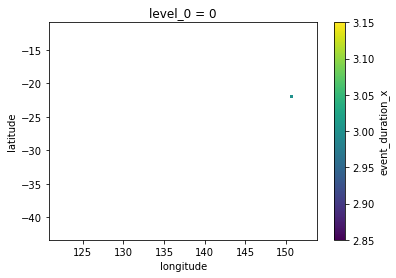

In [83]:
ds['event_duration_x'].sel(level_0=0).plot()

# Solution 2
Count the number of events at each point. Then add this count as an index and convert to Dataset.

For each spatial point along the coast, it will give the info about the first event when event=0 BUT that isn't the same event at each point. Not all points will have the same number of events.  

In [68]:
test = mod_fd[mod_fd.overlap_days != 0].reset_index()
test

,latitude,longitude,time_x,time_end_x,event_duration_x,time_y,time_end_y,event_duration_y,overlap_days
0,-22.00,150.75,1982-01-01,1982-01-03,3,1982-01-02,1982-01-08,7,2
1,-22.00,150.75,1982-03-03,1982-03-08,6,1982-03-04,1982-03-12,9,5
2,-22.00,150.75,1982-03-12,1982-03-14,3,1982-03-04,1982-03-12,9,1
3,-22.00,151.00,1982-01-01,1982-01-03,3,1982-01-02,1982-01-08,7,2
4,-22.00,151.00,1982-03-03,1982-03-08,6,1982-03-04,1982-03-20,17,5
...,...,...,...,...,...,...,...,...,...
392,-14.00,144.50,1982-03-07,1982-03-13,7,1982-03-07,1982-03-15,9,7
393,-14.25,143.75,1982-03-09,1982-03-13,5,1982-03-08,1982-03-15,8,5
394,-14.50,145.50,1982-03-05,1982-03-13,9,1982-03-06,1982-03-18,13,8
395,-13.00,143.50,1982-03-09,1982-03-14,6,1982-03-07,1982-03-11,5,3


In [60]:
import numpy as np
newpt=(np.NaN,np.NaN)
event_pt=[]
nevent=0
for pt in zip(test['latitude'],test['longitude']):
    if pt != newpt:
        nevent=0
        newpt=pt
    else:
        nevent=nevent+1
    event_pt.append(nevent)
len(event_pt)

397

In [61]:
test['event']=event_pt
test

,latitude,longitude,time_x,time_end_x,event_duration_x,time_y,time_end_y,event_duration_y,overlap_days,event
0,-22.00,150.75,1982-01-01,1982-01-03,3,1982-01-02,1982-01-08,7,2,0
1,-22.00,150.75,1982-03-03,1982-03-08,6,1982-03-04,1982-03-12,9,5,1
2,-22.00,150.75,1982-03-12,1982-03-14,3,1982-03-04,1982-03-12,9,1,2
3,-22.00,151.00,1982-01-01,1982-01-03,3,1982-01-02,1982-01-08,7,2,0
4,-22.00,151.00,1982-03-03,1982-03-08,6,1982-03-04,1982-03-20,17,5,1
...,...,...,...,...,...,...,...,...,...,...
392,-14.00,144.50,1982-03-07,1982-03-13,7,1982-03-07,1982-03-15,9,7,0
393,-14.25,143.75,1982-03-09,1982-03-13,5,1982-03-08,1982-03-15,8,5,0
394,-14.50,145.50,1982-03-05,1982-03-13,9,1982-03-06,1982-03-18,13,8,0
395,-13.00,143.50,1982-03-09,1982-03-14,6,1982-03-07,1982-03-11,5,3,0


In [63]:
test.set_index(['event','latitude', 'longitude'], inplace=True)
test

time_x time_end_x  event_duration_x     time_y  \
event latitude longitude                                                      
0     -22.00   150.75    1982-01-01 1982-01-03                 3 1982-01-02   
1     -22.00   150.75    1982-03-03 1982-03-08                 6 1982-03-04   
2     -22.00   150.75    1982-03-12 1982-03-14                 3 1982-03-04   
0     -22.00   151.00    1982-01-01 1982-01-03                 3 1982-01-02   
1     -22.00   151.00    1982-03-03 1982-03-08                 6 1982-03-04   
...                             ...        ...               ...        ...   
0     -14.00   144.50    1982-03-07 1982-03-13                 7 1982-03-07   
      -14.25   143.75    1982-03-09 1982-03-13                 5 1982-03-08   
      -14.50   145.50    1982-03-05 1982-03-13                 9 1982-03-06   
      -13.00   143.50    1982-03-09 1982-03-14                 6 1982-03-07   
      -14.00   137.00    1982-03-14 1982-03-16                 3 1982-03-09   

                         time_end_y  event_duration_y  overlap_days  
event latitude longitude                                             
0     -22.00   150.75    1982-01-08                 7             2  
1     -22.00   150.75    1982-03-12                 9             5  
2     -22.00   150.75    1982-03-12                 9             1  
0     -22.00   151.00    1982-01-08                 7             2  
1     -22.00   151.00    1982-03-20                17             5  
...                             ...               ...           ...  
0     -14.00   144.50    1982-03-15                 9             7  
      -14.25   143.75    1982-03-15                 8             5  
      -14.50   145.50    1982-03-18                13             8  
      -13.00   143.50    1982-03-11                 5             3  
      -14.00   137.00    1982-03-15                 7             2  

[397 rows x 7 columns]

In [66]:
ds=test.to_xarray()

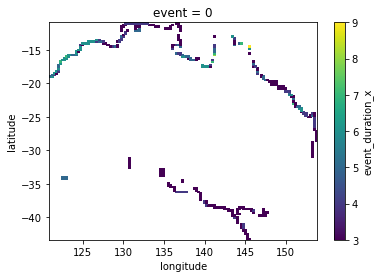

In [81]:
ds['event_duration_x'].sel(event=0).plot()